#Итоговая работа

Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут -

https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты



Требуется выполнить следующее задание:

1. Загрузите файл HR.csv в pandas dataframe

2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

5. Показать распределение сотрудников по зарплатам.

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

10. Загрузить jupyter notebook с решение на github и прислать ссылку



#1. Загрузите файл HR.csv в pandas dataframe

In [2]:
import pandas as pd

In [54]:
hr = pd.read_csv("HR.csv")

hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
#проводим анализ непрерывных величин

#вычисляем количество, среднее значение, минимум/максимум, среднеквадратическое отклонение и квартили
print(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe())

#так же считаем медиану
print(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].median())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  
count          14999.000000        14999.000000  
mean             201.050337            3.498233  
std               49.943099            1.460136  
min               96.000000            2.000000  
25%              156.000000            3.000000  
50%              200.000000            3.000000  
75%              245.000000            4.000000  
max              310.000000           10.

In [6]:
#проводим анализ категориальных величин

#узнаём уникальные значения
for col in hr[['Work_accident','left', 'promotion_last_5years', 'department', 'salary']]:
 print(col, '->', hr[col].unique())

#расчитываем моду
print('\r\n', hr[['Work_accident','left', 'promotion_last_5years', 'department', 'salary']].mode())

#анализируем распределение по категориям
for col in hr[['Work_accident','left', 'promotion_last_5years', 'department', 'salary']]:
  print('\r\n')
  print(hr[col].value_counts())

Work_accident -> [0 1]
left -> [1 0]
promotion_last_5years -> [0 1]
department -> ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary -> ['low' 'medium' 'high']

    Work_accident  left  promotion_last_5years department salary
0              0     0                      0      sales    low


0    12830
1     2169
Name: Work_accident, dtype: int64


0    11428
1     3571
Name: left, dtype: int64


0    14680
1      319
Name: promotion_last_5years, dtype: int64


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


low       7316
medium    6446
high      1237
Name: salary, dtype: int64


# 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [7]:
#расчитываем корреляционную матрицу для количественных переменных
hr_corr = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr().round(3)
print(hr_corr)

#Определите две самые скоррелированные переменные:
'''
Самыми скоррелированными оказались такие пары переменных:
average_montly_hours/number_project -> 0.417
last_evaluation/number_project -> 0.349

Вывод:
Среднее количество часов на рабочем месте в месяц коррелирует с количеством проектов, выполненных за время работы
Время с момента последней оценки в годах коррелирует с количеством проектов, выполненных за время работы
'''

#Определите две наименее скоррелированные переменные:
'''
Наименее скоррелированными оказались следующие пары:
number_project/satisfaction_level -> -0.143
satisfaction_level/time_spend_company -> -0.101

Вывод:
Количество проектов, выполненных за время работы не коррелирует с уровнем удовлетворенности работой
Уровень удовлетворенности работой не коррелирует со стажем работы в компании в годах
'''

#визуализируем корреляционную матрицу для количественных переменных
hr_corr.style.background_gradient(cmap='RdYlGn')



                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level                 1.000            0.105          -0.143   
last_evaluation                    0.105            1.000           0.349   
number_project                    -0.143            0.349           1.000   
average_montly_hours              -0.020            0.340           0.417   
time_spend_company                -0.101            0.132           0.197   

                      average_montly_hours  time_spend_company  
satisfaction_level                  -0.020              -0.101  
last_evaluation                      0.340               0.132  
number_project                       0.417               0.197  
average_montly_hours                 1.000               0.128  
time_spend_company                   0.128               1.000  


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105000,-0.143000,-0.020000,-0.101000
last_evaluation,0.105000,1.000000,0.349000,0.340000,0.132000
number_project,-0.143000,0.349000,1.000000,0.417000,0.197000
average_montly_hours,-0.020000,0.340000,0.417000,1.000000,0.128000
time_spend_company,-0.101000,0.132000,0.197000,0.128000,1.000000


# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [8]:
hr.value_counts('department')

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

#5. Показать распределение сотрудников по зарплатам.

<Axes: title={'center': 'Распределение по уровням заработной платы'}>

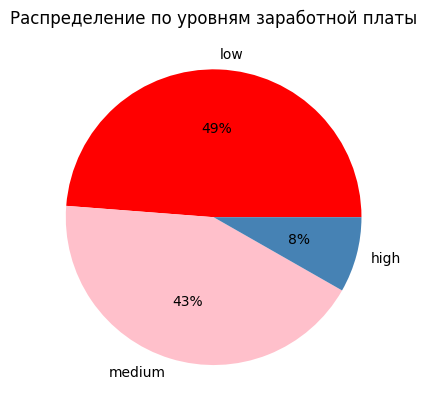

In [9]:
#визуализируем распределение заработной платы на круговой диаграмме
hr.value_counts('salary').plot(kind='pie', y='salary', autopct='%1.0f%%', colors = ['red', 'pink', 'steelblue'], title='Распределение по уровням заработной платы')


#6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

<ipython-input-22-0004a8151073>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


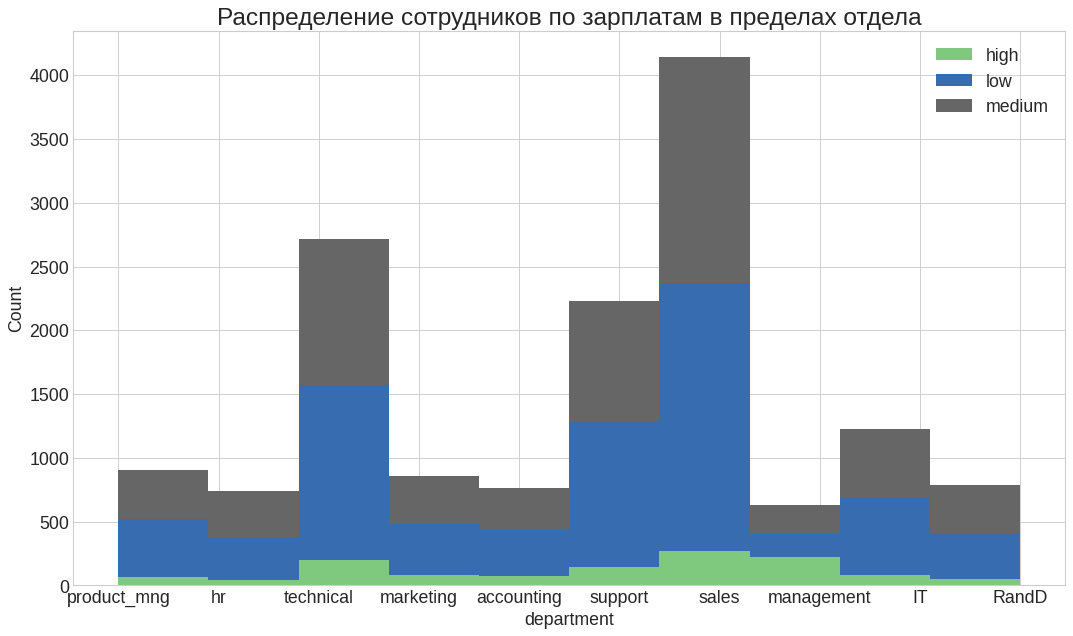

In [23]:
# Prepare data
x_var = 'department'
groupby_var = 'salary'
hr_agg = hr.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [hr[x_var].values.tolist() for i, hr in hr_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Accent(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, hr[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(hr[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Распределение сотрудников по зарплатам в пределах отдела", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Count")
plt.show()

#7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [43]:
import scipy.stats as st

In [47]:
def check_normality(data):

  stat, p = st.shapiro(data) # тест Шапиро-Уилк
  print(f"Статистика = {stat:.3f}, p = {p:.3f}")

  if p < 0.05 : print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
  else :print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

def check_mannwhitneyu(data1, data2) :
  stat, p = st.mannwhitneyu(data1, data2)
  print(f"Статистика = {stat:.5f}, p = {p:.5f}")
  if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения одинаковы')
  else:
    print('Отклоняем нулевую гипотезу, распределения различаются')



In [55]:
hr_low_sal = hr[hr.salary == 'low'].average_montly_hours
hr_high_sal = hr[hr.salary == 'high'].average_montly_hours

#проверим нормальность распределения
check_normality(hr_low_sal)
check_normality(hr_high_sal)

#для данного типа выборок нам подойдёт тест Манна-Уитни
check_mannwhitneyu(hr_low_sal, hr_high_sal)

'''
В качестве вывода:

Сотрудники с высокой заработной платой и сотрудники с низкой, проводят сопоставимое время на работе, гипотизу не отклоняем
'''

Статистика = 0.960, p = 0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Статистика = 0.971, p = 0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения одинаковы


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


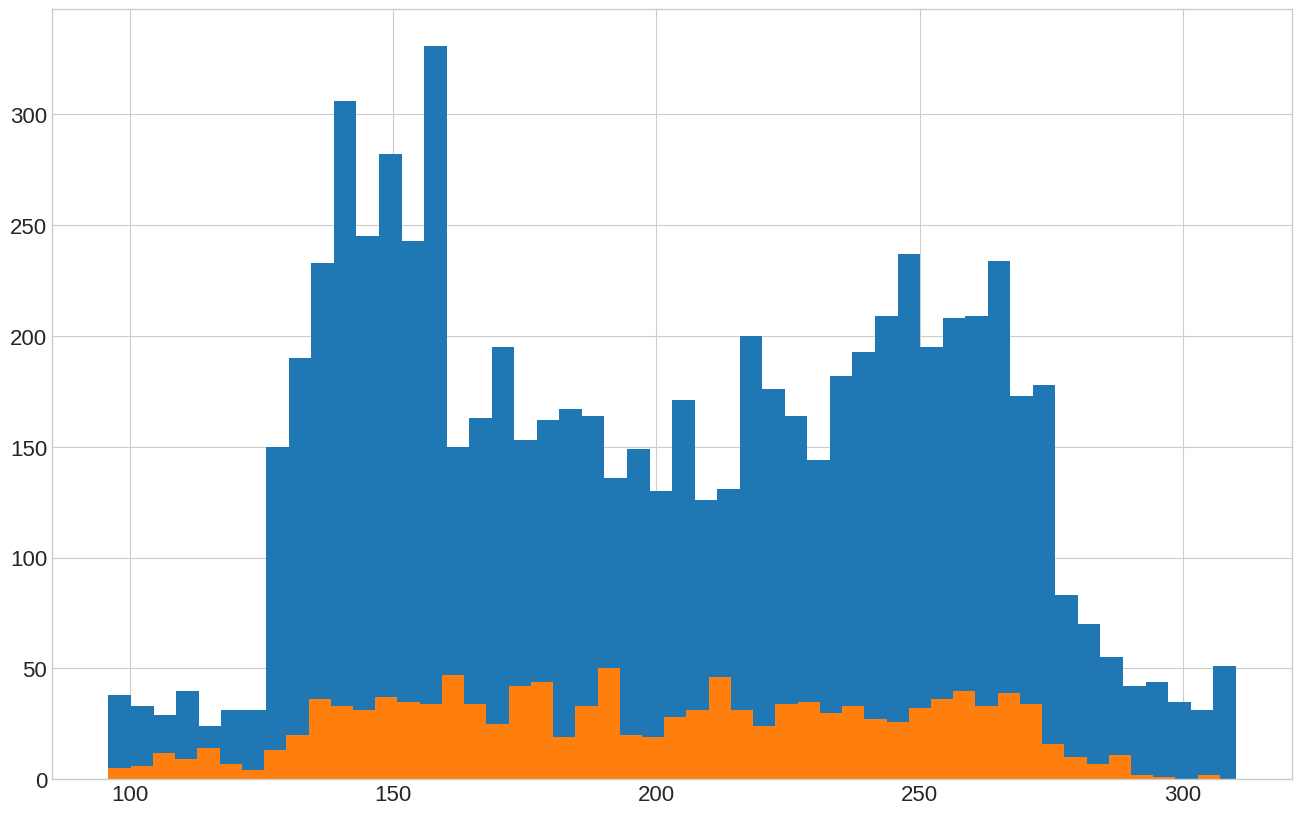

In [64]:
#визуализируем резултат
plt.hist(hr_low_sal, bins=50);
plt.hist(hr_high_sal, bins=50);

#8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов

In [122]:
hr.left.value_counts()

hr_left = hr[hr.left==0]
hr_alive = hr[hr.left==1]

new_hr = pd.DataFrame()

new_hr['group'] = ['left']
new_hr['avg_satisfaction_level'] = [round(hr_left.satisfaction_level.mean(), 2)]
new_hr['avg_number_project'] = [round(hr_left.number_project.mean(), 2)]
new_hr['perc_of_promotion_last_5years'] = [round(100 * (len(hr_left[hr.promotion_last_5years==1])/len(hr_left)), 2)]
new_hr.loc[1, 'group'] = 'alive'
new_hr.loc[1, 'avg_satisfaction_level'] = round(hr_alive.satisfaction_level.mean(), 2)
new_hr.loc[1, 'avg_number_project'] = round(hr_alive.number_project.mean(), 2)
new_hr.loc[1, 'perc_of_promotion_last_5years'] = round(100 * (len(hr_alive[hr.promotion_last_5years==1])/len(hr_alive)), 2)

new_hr.head()

<ipython-input-122-b15c1b129a2a>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_hr['perc_of_promotion_last_5years'] = [round(100 * (len(hr_left[hr.promotion_last_5years==1])/len(hr_left)), 2)]
<ipython-input-122-b15c1b129a2a>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_hr.loc[1, 'perc_of_promotion_last_5years'] = round(100 * (len(hr_alive[hr.promotion_last_5years==1])/len(hr_alive)), 2)


,group,avg_satisfaction_level,avg_number_project,perc_of_promotion_last_5years
0,left,0.67,3.79,2.63
1,alive,0.44,3.86,0.53


#9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.

In [ ]:
# эту тему я, как-то,  пропустил, и даже не нашел подходящих домашних заданий, пусть останется точкой роста, к которой я обязательно вернусь.

#10. Загрузить jupyter notebook с решением на github и прислать ссылку

In [ ]:
#собственно, загружаю сейчас.